In [1]:
using KerrGeodesics
using Plots
using GLMakie
using GeometryBasics
using Interpolations

In [11]:
@time assoc = Kerr_Geodesics(0.9, 10.0, 0.5, 0.8; initPhases = (0.0, 0.0, 0.0, 0.0))

  0.222579 seconds (314.56 k allocations: 21.668 MiB, 7.96% gc time, 99.25% compilation time)


Dict{String, Any} with 18 entries:
  "RadialFrequency"    => 2.79272
  "e"                  => 0.5
  "Cosθ_inc"           => 0.8
  "a"                  => 0.9
  "AngularMomentum"    => 2.83592
  "Frequencies"        => Dict("ϒϕ"=>3.73576, "ϒt"=>171.093, "ϒr"=>2.79272, "ϒθ…
  "InitialPhases"      => (0.0, 0.0, 0.0, 0.0)
  "RadialRoots"        => [20.0, 6.66667, 1.44177, 0.271714]
  "Energy"             => 0.96412
  "ConstantsOfMotion"  => Dict("Q"=>4.54441, "Lz"=>2.83592, "E"=>0.96412)
  "PolarFrequency"     => 3.55291
  "CarterConstant"     => 4.54441
  "Parametrization"    => "Mino"
  "FourVelocity"       => Function[ut_contrav, ur_contrav, uθ_contrav, uφ_contr…
  "Trajectory"         => Function[t, r, θ, ϕ]
  "Type"               => ["Bound", "Eccentric", "Inclined"]
  "AzimuthalFrequency" => 3.73576
  "p"                  => 10.0

In [12]:
t, r, θ, ϕ = assoc["Trajectory"]
λ_values = range(0, 20, 1000)
t_values = [t(λ) for λ in λ_values]
r_values = [r(λ) for λ in λ_values]
θ_values = [θ(λ) for λ in λ_values]
ϕ_values = [ϕ(λ) for λ in λ_values]

1000-element Vector{Float64}:
  0.0
  0.09444860065046555
  0.18839311547684132
  0.28135578866136024
  0.372908423648022
  0.4626900770891353
  0.5504178966617911
  0.6358909983923335
  0.7189882807688912
  0.7996617144885212
  ⋮
 74.12284332849114
 74.18486400077045
 74.24661715924086
 74.30830700006439
 74.37013720712353
 74.4323112595792
 74.49503271264302
 74.55850531830623
 74.622932845432

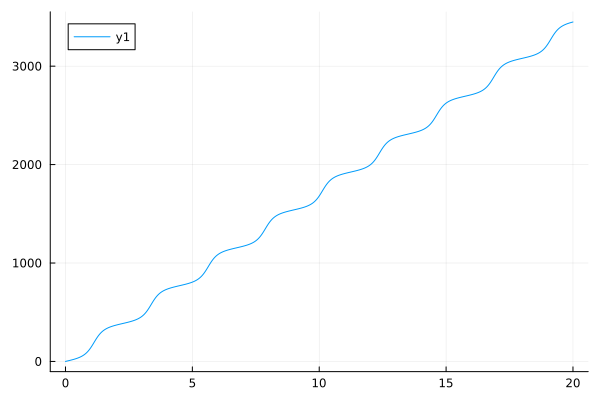

In [13]:
Plots.plot(λ_values, t_values)

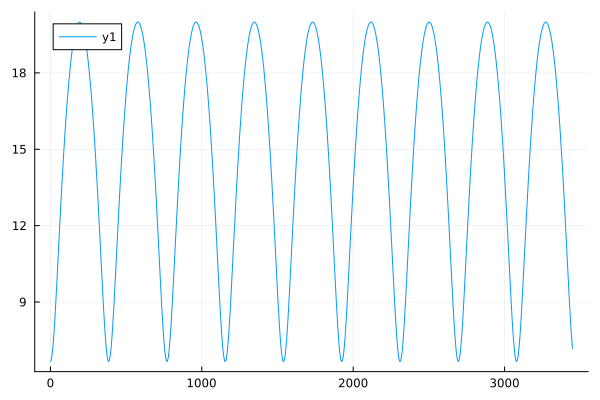

In [14]:
Plots.plot(t_values, r_values)

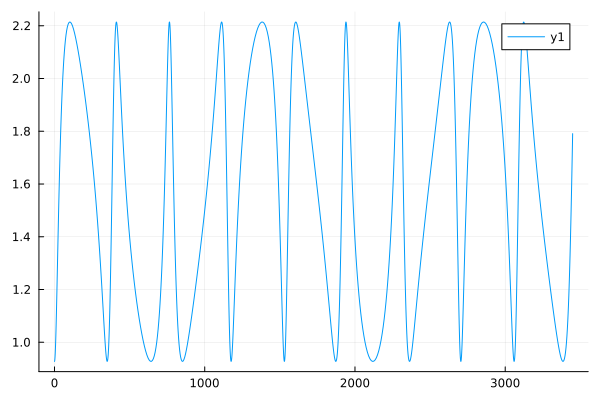

In [15]:
Plots.plot(t_values, θ_values)

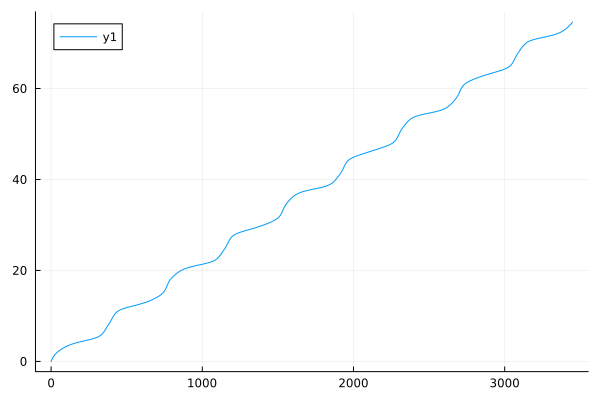

In [16]:
Plots.plot(t_values, ϕ_values)

In [18]:
x_values = r_values .* sin.(θ_values) .* cos.(ϕ_values)
y_values = r_values .* sin.(θ_values) .* sin.(ϕ_values)
z_values = r_values .* cos.(θ_values)

a = assoc["a"]
rp = 1 + sqrt(1 - a^2)

nframes = 900
fps = 30

t_video = range(t_values[1], t_values[end], length=nframes)

itp_x = LinearInterpolation(t_values, x_values)
itp_y = LinearInterpolation(t_values, y_values)
itp_z = LinearInterpolation(t_values, z_values)

fig = Figure(size=(800, 600))
ax = Axis3(fig[1, 1], title="Particle's geodesic trajectory around a Kerr black hole")
sphere_mesh = Sphere(Point3f(0,0,0), rp)
mesh!(ax, sphere_mesh, color=:black)

lines!(ax, x_values, y_values, z_values, color=:gray)

point = Observable(Point3f(itp_x(t_video[1]), itp_y(t_video[1]), itp_z(t_video[1])))
GLMakie.scatter!(ax, point; color=:red, markersize=10)

record(fig, "Trajectory_generic.gif", 1:nframes; framerate=fps) do i
    point[] = Point3f(itp_x(t_video[i]), itp_y(t_video[i]), itp_z(t_video[i]))
end

fig